In [46]:
#!pip install imblearn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

In [47]:
df = pd.read_csv('exoplanets_cleaned.csv')
df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass,habitability_class
0,55 Cnc e,55 Cnc,0,2,5,Radial Velocity,0.736544,0.01544,2.080000,0.185565,0.06100,1958.0,5234.0,0.943,0.905,Not-Habitable Terrestrial
1,AU Mic b,AU Mic,0,1,3,Transit,8.463000,0.06450,4.070000,0.363102,0.00000,593.0,3700.0,0.750,0.500,Not-Habitable Terrestrial
2,AU Mic b,AU Mic,1,1,3,Transit,8.463080,0.06490,3.956770,0.353000,0.00577,600.0,3678.0,0.744,0.510,Not-Habitable Terrestrial
3,AU Mic c,AU Mic,0,1,3,Transit,18.859019,0.11010,3.240000,0.289054,0.00000,454.0,3700.0,0.750,0.500,Not-Habitable Terrestrial
4,AU Mic c,AU Mic,1,1,3,Transit,18.859690,0.11080,2.522021,0.225000,0.00338,459.0,3678.0,0.744,0.510,Not-Habitable Terrestrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15158,XO-5 b,XO-5,0,1,1,Transit,4.187757,0.04940,12.206601,1.089000,NaN,1203.0,5370.0,1.065,0.914,Hot Jupiters
15159,XO-6 b,XO-6,1,1,1,Transit,3.765001,0.08150,23.202630,2.070000,0.00000,1577.0,6720.0,1.930,1.470,Hot Jupiters
15160,XO-7 b,XO-7,1,1,1,Transit,2.864142,0.04421,15.389957,1.373000,0.03800,1743.0,6250.0,1.480,1.405,Hot Jupiters
15161,pi Men c,HD 39091,0,1,3,Transit,6.268340,0.06702,2.060000,0.183781,0.00000,1147.0,5870.0,1.100,1.020,Not-Habitable Terrestrial


In [48]:
label_encoder = LabelEncoder()
df['habitability_encoded'] = label_encoder.fit_transform(df['habitability_class'])

X = df[['pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']].copy()
y = df['habitability_encoded']

In [49]:
nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

pl_rade       0.000000
pl_eqt        0.000000
pl_orbper     0.000000
pl_orbsmax    0.000000
st_teff       0.296775
st_rad        0.230825
st_mass       0.250610
dtype: float64

In [50]:
for column in X.columns:
    median = X[column].median()
    X[column] = X[column].fillna(median)

nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

pl_rade       0.0
pl_eqt        0.0
pl_orbper     0.0
pl_orbsmax    0.0
st_teff       0.0
st_rad        0.0
st_mass       0.0
dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=111)

In [52]:
smote = SMOTE(random_state=111)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
def train_base_model(X_train, X_test, y_train, y_test):

    dec_tree = DecisionTreeClassifier(random_state = 777)
    dec_tree.fit(X_train, y_train)

    dec_y_pred = dec_tree.predict(X_test)

    dec_accuracy = accuracy_score(y_test, dec_y_pred)
    dec_precision = precision_score(y_test, dec_y_pred, average='macro', pos_label=1)
    dec_recall = recall_score(y_test, dec_y_pred, average='macro', pos_label=1)

    ConfusionMatrixDisplay(confusion_matrix(y_test, dec_y_pred), display_labels=[str(c) for c in dec_tree.classes_]).plot()

    rf = RandomForestClassifier(random_state=777)
    rf.fit(X_train, y_train)

    rf_y_pred = rf.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    rf_precision = precision_score(y_test, rf_y_pred, average='macro', pos_label=1)
    rf_recall = recall_score(y_test, rf_y_pred, average='macro', pos_label=1)

    ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_pred), display_labels=[str(c) for c in rf.classes_]).plot()

    print(f"Decision Tree \n\tAccuracy: {(dec_accuracy) * 100:.2f}% \n\tPrecision: {(dec_precision) * 100:.2f}% \n\tRecall: {(dec_recall) * 100:.2f}%")
    print(f"Random Forest \n\tAccuracy: {(rf_accuracy) * 100:.2f}% \n\tPrecision: {(rf_precision) * 100:.2f}% \n\tRecall: {(rf_recall) * 100:.2f}%")

    return dec_accuracy, rf_accuracy

Decision Tree 
	Accuracy: 99.93% 
	Precision: 99.55% 
	Recall: 99.26%
Random Forest 
	Accuracy: 99.97% 
	Precision: 99.77% 
	Recall: 99.63%


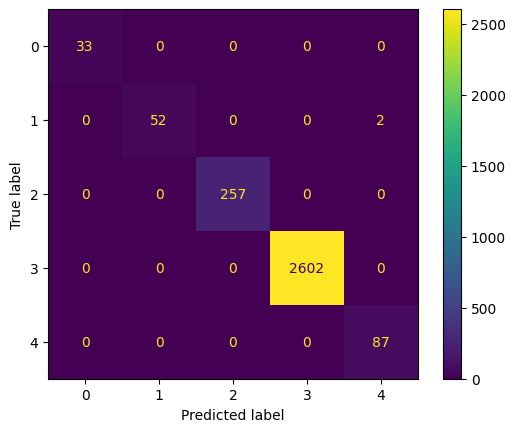

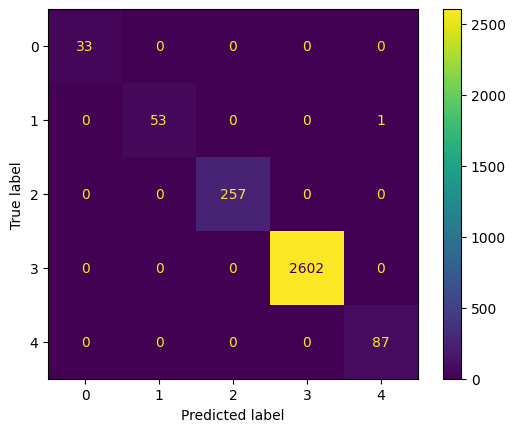

In [55]:
base_dt_acc, base_rf_acc = train_base_model(X_train_balanced, X_test, y_train_balanced, y_test)

In [102]:
def tune_rand_forest(X_train, X_test, y_train, y_test):

    tuned = [[],[],[]]
    params = []
    n_est = [50, 100, 150, 200]
    max_depth = [None, 15, 30]
    min_samples_split = [5, 10, 15]

    for n in n_est:
        for md in max_depth:
            for mss in min_samples_split:
                rf = RandomForestClassifier(n_estimators=n, max_depth=md, min_samples_split=mss, random_state=777)
                rf.fit(X_train, y_train)
                rf_y_pred = rf.predict(X_test)
                accuracy = accuracy_score(y_test, rf_y_pred)
                precision = precision_score(y_test, rf_y_pred, average='macro', pos_label=1)
                recall = recall_score(y_test, rf_y_pred, average='macro', pos_label=1)
                tuned[0].append(accuracy)
                tuned[1].append(precision)
                tuned[2].append(recall)
                params.append((accuracy, precision, recall, n, md, mss, rf_y_pred))
    
    return tuned, params

In [131]:
tuned_acc, params = tune_rand_forest(X_train_balanced, X_test, y_train_balanced, y_test)


In [132]:
index_max = np.argmax(tuned_acc[0])
print(f"Maximum tuned random forest \n\tAccuracy: {tuned_acc[0][index_max]*100:.2f}% \n\tPrecision: {tuned_acc[1][index_max]*100:.2f}% \n\tRecall: {tuned_acc[2][index_max]*100:.2f}%")

Maximum tuned random forest 
	Accuracy: 99.97% 
	Precision: 99.77% 
	Recall: 99.63%


In [133]:
print(f"Maximum tuned random forest \n\tN estimators: {params[index_max][3]} \n\tMax depth: {params[index_max][4]} \n\tMin samples split: {params[index_max][5]}")

Maximum tuned random forest 
	N estimators: 50 
	Max depth: None 
	Min samples split: 5


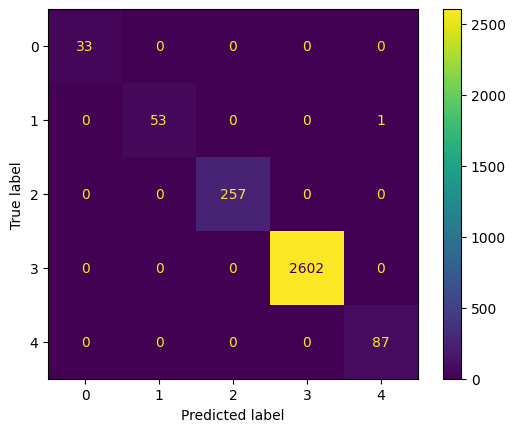

In [135]:
ConfusionMatrixDisplay(confusion_matrix(y_test, params[index_max][6]), display_labels=[0,1,2,3,4]).plot()

In [142]:
def visualize(base_dt_acc, base_rf_acc, accuracies):

    total_accuracies = [base_dt_acc, base_rf_acc] + accuracies
    labels = ['Base DT', 'Base RF'] + ['Tuned RF'] * len(accuracies)

    combined = list(zip(total_accuracies, labels))
    combined.sort(key=lambda x: x[0])

    sorted_acc, sorted_labels = zip(*combined)

    colors = ['red' if acc < base_rf_acc else 'green' for acc in sorted_acc]

    plt.figure(figsize=(15,8))
    bars = plt.bar(range(len(sorted_acc)), sorted_acc, color=colors)
    plt.xlabel('Model Variants')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Decision Tree and Random Forest Models')
    plt.xticks(range(len(sorted_acc)), sorted_labels, rotation=90)
    #ax = plt.gca()
    #ax.set_ylim([0.995, 1.0])

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height()*100,3), ha='center', va='bottom', fontsize=6)
    
    plt.tight_layout()
    plt.show()

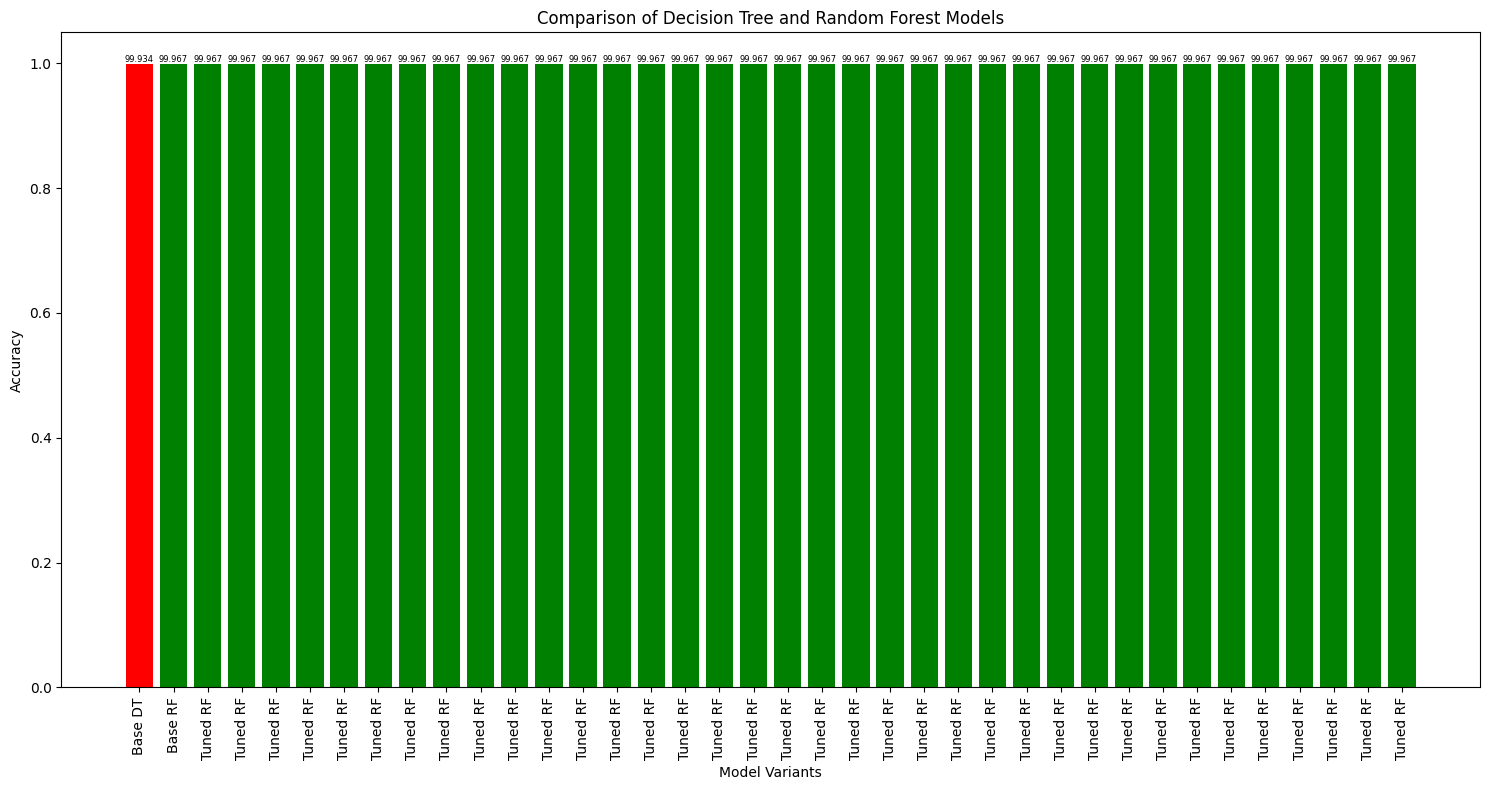

In [143]:
visualize(base_dt_acc, base_rf_acc, tuned_acc[0])

In [148]:
results_df = pd.DataFrame(params, columns=['accuracy', 'precision', 'recall', 'n_estimators', 'max_depth', 'min_samples_split', 'y_pred'])
results_df

,accuracy,precision,recall,n_estimators,max_depth,min_samples_split,y_pred
0,0.99967,0.997727,0.996296,50,NaN,5,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
1,0.99967,0.997727,0.996296,50,NaN,10,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
2,0.99967,0.997727,0.996296,50,NaN,15,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
3,0.99967,0.997727,0.996296,50,15.0,5,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
4,0.99967,0.997727,0.996296,50,15.0,10,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
5,0.99967,0.997727,0.996296,50,15.0,15,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
6,0.99967,0.997727,0.996296,50,30.0,5,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
7,0.99967,0.997727,0.996296,50,30.0,10,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
8,0.99967,0.997727,0.996296,50,30.0,15,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
9,0.99967,0.997727,0.996296,100,NaN,5,"[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, ..."
